In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import normalize
from sklearn.cluster import AgglomerativeClustering as AC
import scipy.cluster.hierarchy as shc

In [3]:
df = pd.read_csv('https://raw.githubusercontent.com/dphi-official/Datasets/master/Wholesale_customers_data.csv')
df.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185


In [5]:
Scaled_data = pd.DataFrame(normalize(df),columns=df.columns)
Scaled_data.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,0.000112,0.000168,0.708333,0.539874,0.422741,0.011965,0.149505,0.074809
1,0.000125,0.000188,0.442198,0.614704,0.599540,0.110409,0.206342,0.111286
2,0.000125,0.000187,0.396552,0.549792,0.479632,0.150119,0.219467,0.489619
3,0.000065,0.000194,0.856837,0.077254,0.272650,0.413659,0.032749,0.115494
4,0.000079,0.000119,0.895416,0.214203,0.284997,0.155010,0.070358,0.205294


In [6]:
fig=plt.figure(figsize=(10,14))

<Figure size 720x1008 with 0 Axes>

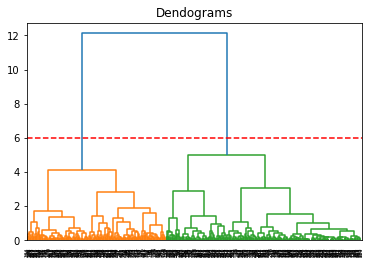

In [8]:
fig.add_subplot(2,1,1)
plt.title('Dendograms')

#Plot the dendrogram.
dend = shc.dendrogram(shc.linkage(Scaled_data,method='ward'))
#Draw a dotted line to mark the point delimiting the clusters.
plt.axhline(y=6,color='r',linestyle='--')

In [9]:
#Create two clusters on the dataset using euclidian distance as the distance matrix.
cluster = AC(n_clusters=2,affinity='euclidean',linkage='ward')
fit_data = pd.DataFrame(cluster.fit_predict(Scaled_data))
fit_data.head()

,0
0,1
1,1
2,1
3,0
4,0


Text(0, 0.5, 'Grocery purchase')

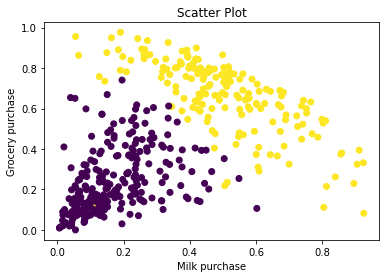

In [12]:
fig.add_subplot(2,1,2)
plt.scatter(Scaled_data['Milk'],Scaled_data['Grocery'],c=cluster.labels_)
plt.title('Scatter Plot')
plt.xlabel('Milk purchase')
plt.ylabel('Grocery purchase')